In [1]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import pandas
import statsmodels.api as sm
from numpy import asarray
from numpy import savetxt
import pickle
import csv


#Import imputs
from ageBandPowerr import plotbar_info_bandpower1
from ageBandPowerr import calcul
from ageBandPowerr import plotbar_info_rac

Meta-file

Provides an overview of the datasets within the MPI-Leipzig Mind-Brain-Body database.


Short description of each of the columns in this CSV file.

ID: Participant's IDs are anonimized acording to BIDS format

Gender: 1 = female; 2 = male 

Age (5-year bins): Age bins with widths of 5 years.

Handedness

Education: School Level

DRUG_0=negative_1=Positive	Drug_Substance

Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)
SKID diagnosis: Structured Clinical Interview for DSM-IV (SCID-I). 
SKID diangosis 1:
SKID diagnosis 2:
Comments_SKID_assessment	
Alcohol_Dependence_In_1st-3rd_Degree_relative	
Hamilton_Scale
BSL23_sumscore	
BSL23_behavior	
AUDIT	
Standard_Alcoholunits_Last_28days	
Alcohol_Dependence_In_1st-3rd_Degree_relative
Relationship_Status		


In [2]:
#Import the data to analise
with open('/Users/laianavarroolivella/Project_G/EEG_G2/Age_Gender/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
Age = data['Age']
Gender = data['Gender_ 1=female_2=male']
Handedness = data['Handedness']
Drugs = data['DRUG_0=negative_1=Positive']


In [3]:
#Import the data to analise
# open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Project_G/EEG_G2/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

In [4]:
#Data EO amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_final_save.txt", "rb") as fp: 
    dataEO = pickle.load(fp)

#Data EC amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_finalEC_save.txt", "rb") as fp: 
    dataEC = pickle.load(fp)

#Llista dels noms dels pacients EC 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    listEC_Names = pickle.load(fp)

#Llista dels noms dels pacients EO 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    listEO_Names = pickle.load(fp)

In [5]:
# 1 = Female
# 2 = Male
genderCount = {}
for item in Gender:
       genderCount[item] = genderCount.get(item, 0) + 1
print(genderCount)

{'2': 145, '1': 82}


In [6]:
ageCount = {}
for item in Age:
       ageCount[item] = ageCount.get(item, 0) + 1
print(ageCount)

{'20-25': 79, '25-30': 60, '60-65': 19, '30-35': 13, '70-75': 22, '65-70': 25, '75-80': 4, '55-60': 4, '35-40': 1}


In [7]:
# Drugs si = 1.0
# Drugs ni = 0.0
drugsCount = {}
for item in Drugs:
       drugsCount[item] = drugsCount.get(item, 0) + 1
print(drugsCount)

{'0.0': 208, '1.0': 12, '': 7}


In [8]:
handednessCount = {}
for item in Handedness:
       handednessCount[item] = handednessCount.get(item, 0) + 1
print(handednessCount)

{'right': 202, 'ambidextrous': 3, 'left': 21, 'ambedextor ': 1}


In [9]:
lis_noms = ['Anterior_midline', 'Left_frontal', 'Right_frontal', 'Left_temporal', 'Left_central', 'Left_parietal', 'Left_Occipital', 'Right_Occipital', 'Right_parietal', 'Right_temporal', 'Posterior_midline', 'Right_central']

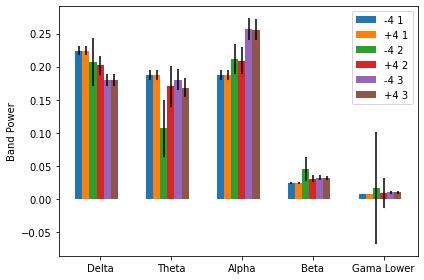

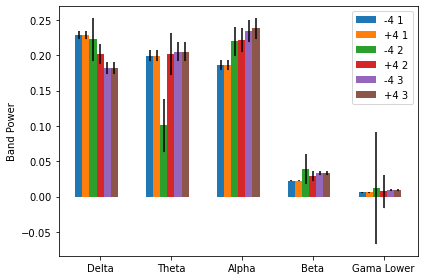

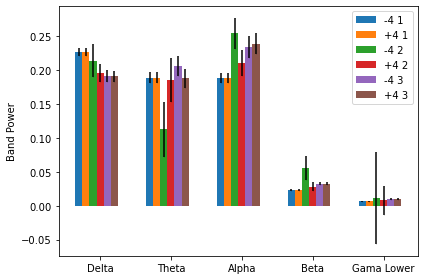

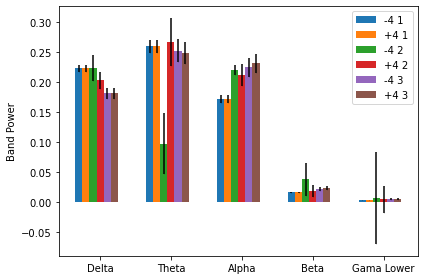

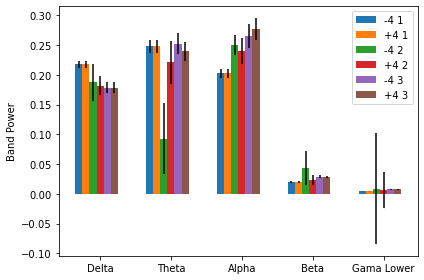

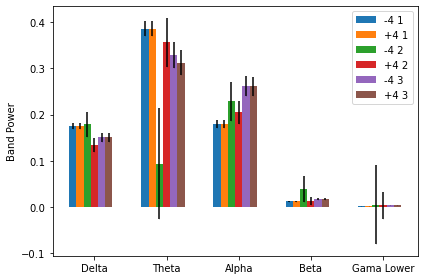

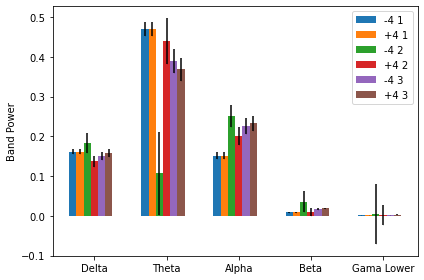

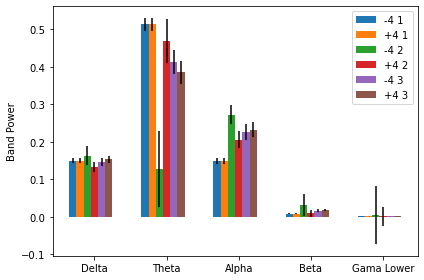

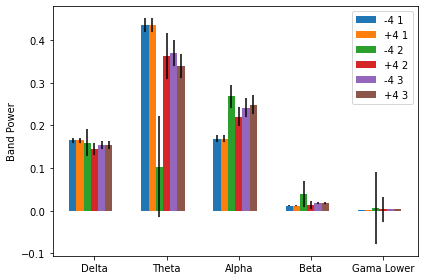

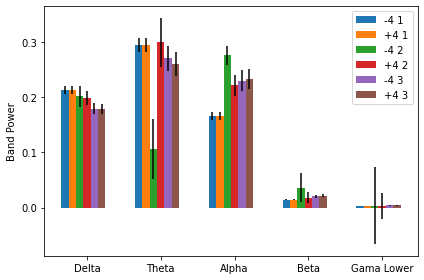

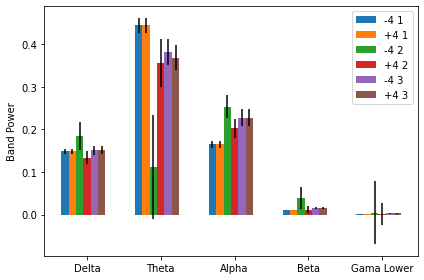

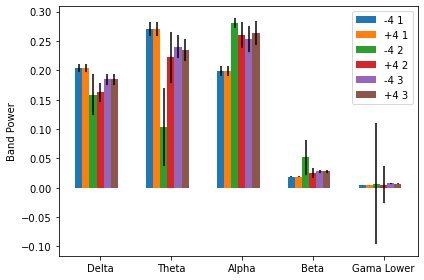

Well


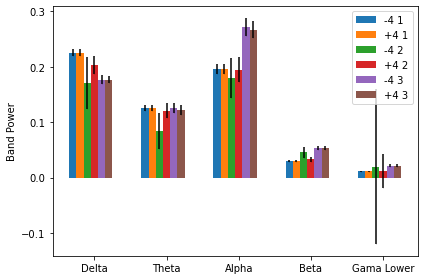

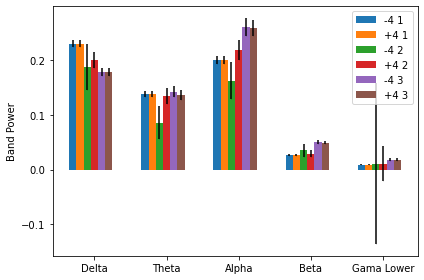

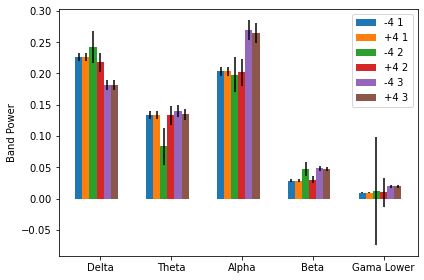

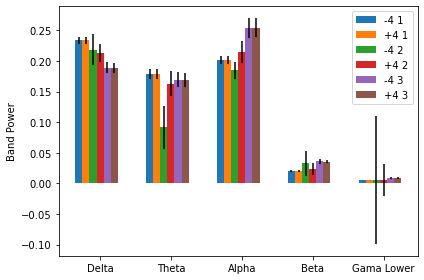

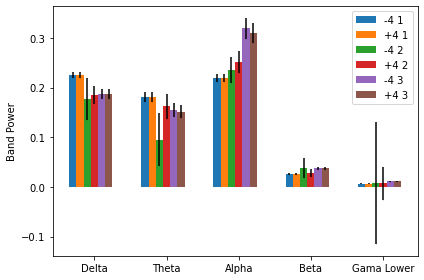

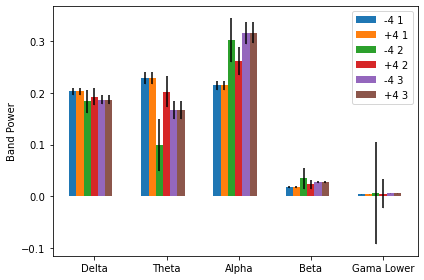

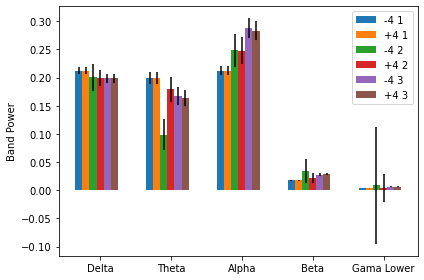

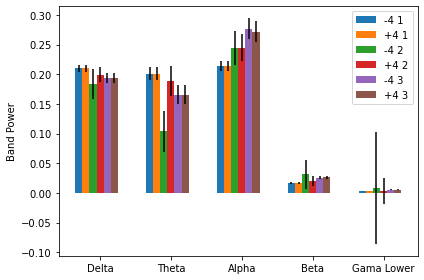

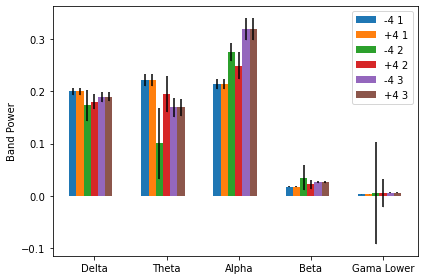

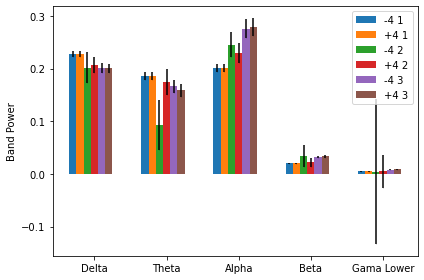

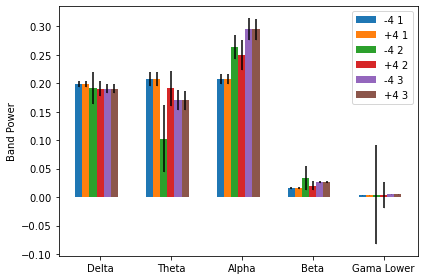

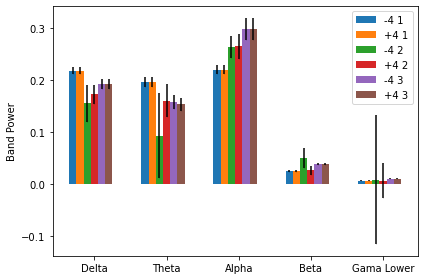

In [10]:
band_emotio_EC_1 = []
band_emotio_EO_2 = []
band_emotio_EO_3 = []
band_emotio_EO_1 = []
band_emotio_EC_2 = []
band_emotio_EC_3 = []

for r in range(0,12):
    band_m4_1, band_m4_2, band_m4_3 = plotbar_info_bandpower1(names, listEC_Names, TeiQueSF_emotionality, Age, dataEC[r])
    band_emotio_EC_1.append(band_m4_1)
    band_emotio_EC_2.append(band_m4_2)
    band_emotio_EC_3.append(band_m4_3)

print('Well')

for r in range(0,12):
    band_m4_1, band_m4_2, band_m4_3 = plotbar_info_bandpower1(names, listEO_Names, TeiQueSF_emotionality, Age, dataEO[r])
    band_emotio_EO_1.append(band_m4_1)
    band_emotio_EO_2.append(band_m4_2)
    band_emotio_EO_3.append(band_m4_3)

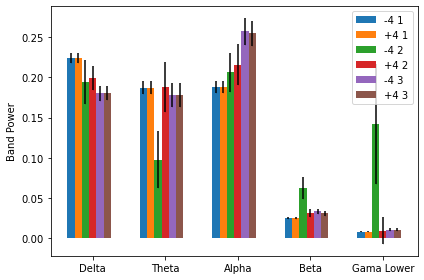

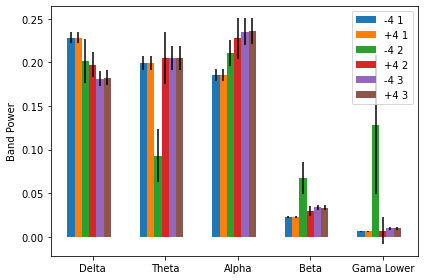

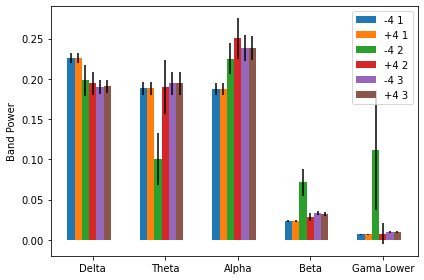

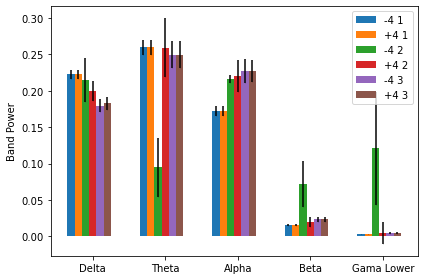

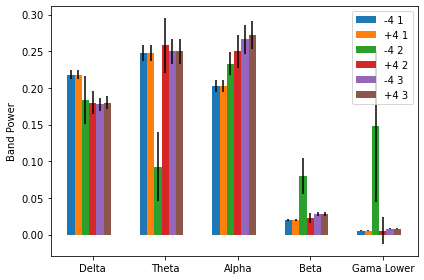

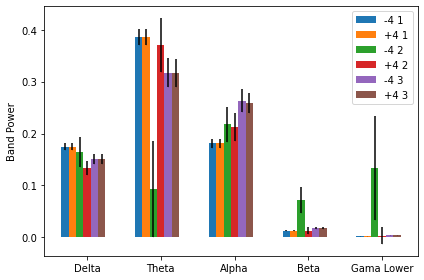

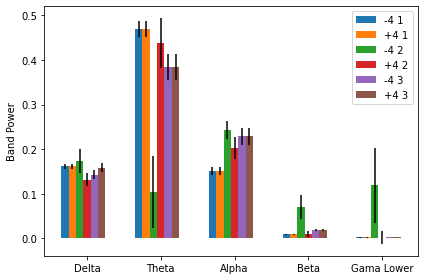

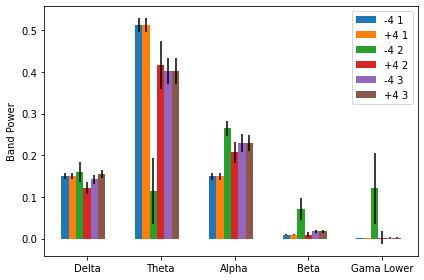

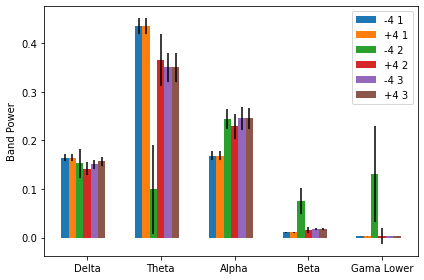

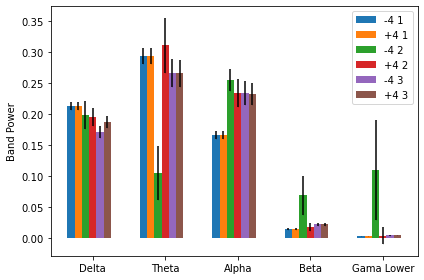

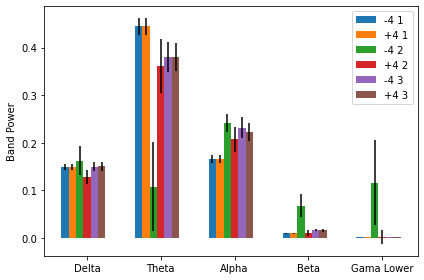

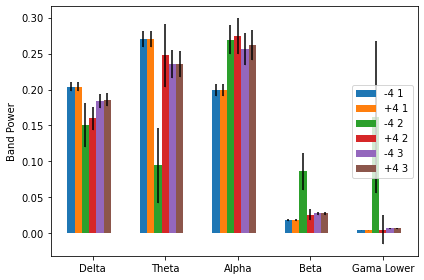

Well


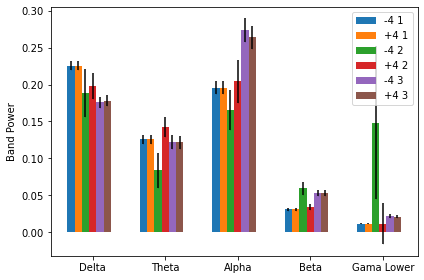

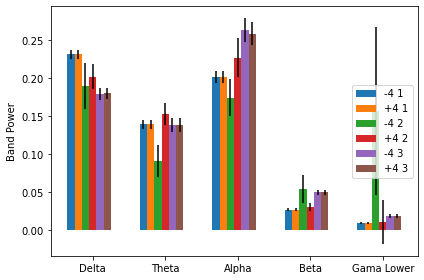

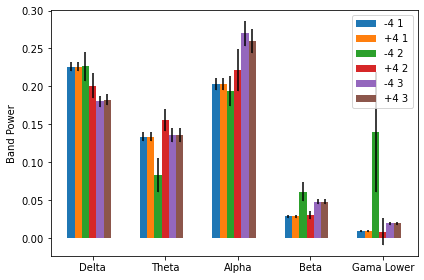

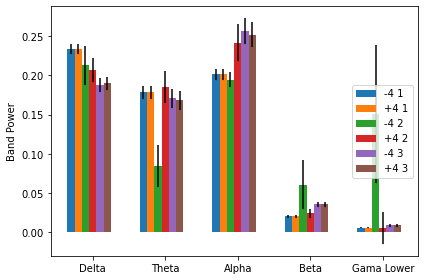

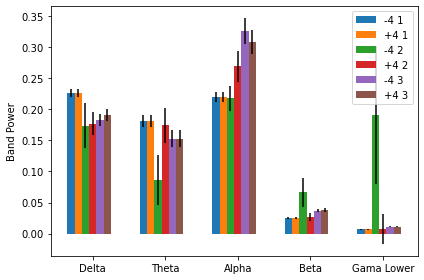

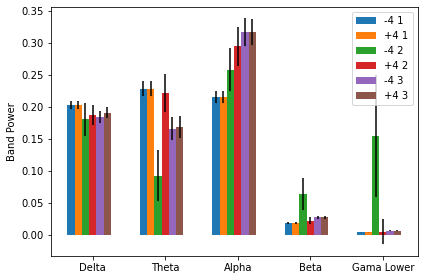

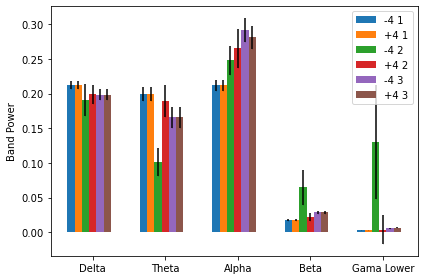

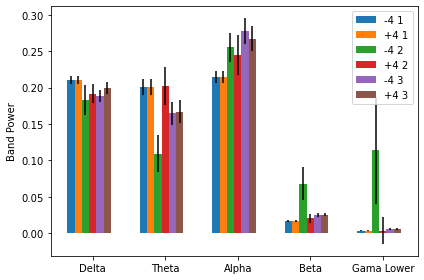

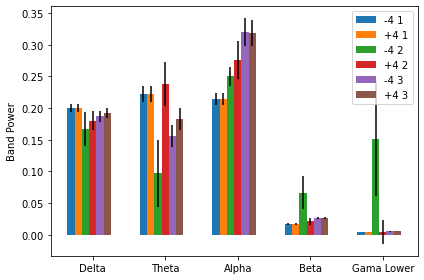

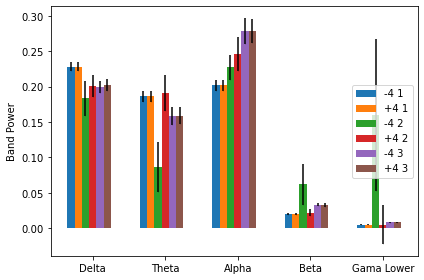

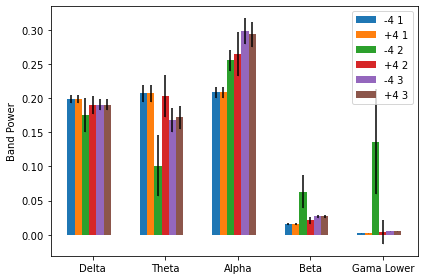

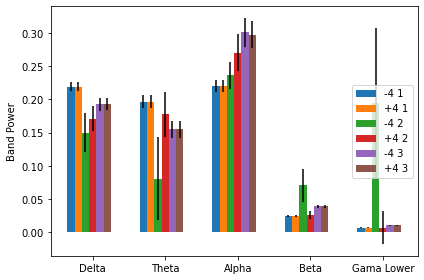

In [11]:
band_well_EC_1 = []
band_well_EO_2 = []
band_well_EO_3 = []
band_well_EO_1 = []
band_well_EC_2 = []
band_well_EC_3 = []

for r in range(0,12):
    band_m4_1, band_m4_2, band_m4_2 = plotbar_info_bandpower1(names, listEC_Names, TeiQueSF_well_being, Age, dataEC[r])
    band_well_EC_1.append(band_m4_1)
    band_well_EC_2.append(band_m4_2)
    band_well_EC_3.append(band_m4_3)

print('Well')

for r in range(0,12):
    band_m4_1, band_m4_2, band_m4_2 = plotbar_info_bandpower1(names, listEO_Names, TeiQueSF_well_being, Age, dataEO[r])
    band_well_EO_1.append(band_m4_1)
    band_well_EO_2.append(band_m4_2)
    band_well_EO_3.append(band_m4_3)

In [12]:
rac_emotio_1_EO = []
rac_emotio_2_EO = []
rac_emotio_3_EO = []
rac_emotio_1_EC = []
rac_emotio_2_EC = []
rac_emotio_3_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_1, rac_info_2, rac_info_3 = plotbar_info_rac(names, listEO_Names, TeiQueSF_emotionality, Age, dataEO[r])
    rac_emotio_1_EO.append(rac_info_1)
    rac_emotio_2_EO.append(rac_info_2)
    rac_emotio_3_EO.append(rac_info_3)

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_1, rac_info_2, rac_info_3 = plotbar_info_rac(names, listEC_Names, TeiQueSF_emotionality, Age, dataEC[r])
    rac_emotio_1_EC.append(rac_info_1)
    rac_emotio_2_EC.append(rac_info_2)
    rac_emotio_3_EC.append(rac_info_3)

), RanksumsResult(statistic=-0.13366325757190367, pvalue=0.8936688605951132), RanksumsResult(statistic=0.14201721117014765, pvalue=0.8870664109318487), RanksumsResult(statistic=0.20049488635785548, pvalue=0.8410935569020338)]
Left_central
20-40
[RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0)]
40-60
[RanksumsResult(statistic=0.16770509831248423, pvalue=0.8668152851274225), RanksumsResult(statistic=-0.9503288904374105, pvalue=0.3419451635360653), RanksumsResult(statistic=-0.2795084971874737, pvalue=0.7798546179649191), RanksumsResult(statistic=1.0621322893124001, pvalue=0.28817563338396635), RanksumsResult(statistic=0.5031152949374527, pvalue=0.6148832138570344)]
40-60
[RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.06683162878595184, pvalue=0.9467157435596671), RanksumsResult(statistic=-0.07518558238

In [13]:
rac_well_1_EO = []
rac_well_2_EO = []
rac_well_3_EO = []
rac_well_1_EC = []
rac_well_2_EC = []
rac_well_3_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_1, rac_info_2, rac_info_3 = plotbar_info_rac(names, listEO_Names, TeiQueSF_well_being, Age, dataEO[r])
    rac_well_1_EO.append(rac_info_1)
    rac_well_2_EO.append(rac_info_2)
    rac_well_3_EO.append(rac_info_3)

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_1, rac_info_2, rac_info_3 = plotbar_info_rac(names, listEC_Names, TeiQueSF_well_being, Age, dataEC[r])
    rac_well_1_EC.append(rac_info_1)
    rac_well_2_EC.append(rac_info_2)
    rac_well_3_EC.append(rac_info_3)

[RanksumsResult(statistic=0.35, pvalue=0.7263386976487618), RanksumsResult(statistic=-1.65, pvalue=0.0989429360672962), RanksumsResult(statistic=-0.65, pvalue=0.5156922216117295), RanksumsResult(statistic=2.15, pvalue=0.031555214782181), RanksumsResult(statistic=1.75, pvalue=0.08011831372763417)]
40-60
[RanksumsResult(statistic=-0.27129294247974295, pvalue=0.7861657340914374), RanksumsResult(statistic=0.06260606364917146, pvalue=0.950080200798393), RanksumsResult(statistic=0.26294546732652013, pvalue=0.7925926111199841), RanksumsResult(statistic=0.14608081518140006, pvalue=0.8838575912092959), RanksumsResult(statistic=0.17112324064106865, pvalue=0.8641268620132488)]
Left_temporal
20-40
[RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0), RanksumsResult(statistic=0.0, pvalue=1.0)]
40-60
[RanksumsResult(statistic=0.05, pvalue=0.960122388323255), RanksumsResult(statistic

In [14]:
corrEmotio_1_EO = []
corrEmotio_2_EO = []
corrEmotio_3_EO = []
corrEmotio_1_EC = []
corrEmotio_2_EC = []
corrEmotio_3_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    cor1, cor2, cor3 = calcul(names, listEO_Names, TeiQueSF_emotionality, Age, dataEO[r], 2, 7)
    corrEmotio_1_EO.append(cor1)
    corrEmotio_2_EO.append(cor2)
    corrEmotio_3_EO.append(cor3)

for r in range(0,12):
    print(str(lis_noms[r]))
    cor1, cor2, cor3 = calcul(names, listEC_Names, TeiQueSF_emotionality, Age, dataEC[r], 2, 7)
    corrEmotio_1_EC.append(cor1)
    corrEmotio_2_EC.append(cor2)
    corrEmotio_3_EC.append(cor3)

Anterior_midline
Left_frontal
Right_frontal
Left_temporal
Left_central
Left_parietal
Left_Occipital
Right_Occipital
Right_parietal
Right_temporal
Posterior_midline
Right_central
Anterior_midline
Left_frontal
Right_frontal
Left_temporal
Left_central
Left_parietal
Left_Occipital
Right_Occipital
Right_parietal
Right_temporal
Posterior_midline
Right_central


In [15]:
corrWell_1_EO = []
corrWell_2_EO = []
corrWell_3_EO = []
corrWell_1_EC = []
corrWell_2_EC = []
corrWell_3_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    cor1, cor2, cor3 = calcul(names, listEO_Names, TeiQueSF_well_being, Age, dataEO[r], 2, 7)
    corrWell_1_EO.append(cor1)
    corrWell_2_EO.append(cor2)
    corrWell_3_EO.append(cor3)

for r in range(0,12):
    print(str(lis_noms[r]))
    cor1, cor2, cor3= calcul(names, listEC_Names, TeiQueSF_well_being, Age, dataEC[r], 2, 7)
    corrWell_1_EC.append(cor1)
    corrWell_2_EC.append(cor2)
    corrWell_3_EC.append(cor3)

Anterior_midline
Left_frontal
Right_frontal
Left_temporal
Left_central
Left_parietal
Left_Occipital
Right_Occipital
Right_parietal
Right_temporal
Posterior_midline
Right_central
Anterior_midline
Left_frontal
Right_frontal
Left_temporal
Left_central
Left_parietal
Left_Occipital
Right_Occipital
Right_parietal
Right_temporal
Posterior_midline
Right_central


In [16]:
lis_noms = ['Anterior_midline', 'Left_frontal', 'Right_frontal', 'Left_temporal', 'Left_central', 'Left_parietal', 'Left_Occipital', 'Right_Occipital', 'Right_parietal', 'Right_temporal', 'Posterior_midline', 'Right_central']
labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gama Lower']

In [17]:
#EO - emotionality - 1 ('20-25' '25-30' '30-35' '35-40')
EOemotionality_1 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_1[i][e])
        lis_labels.append(corrEmotio_1_EO[i][e][0])
        lis_labels.append(corrEmotio_1_EO[i][e][1])
        lis_labels.append(rac_emotio_1_EO[i][e][1])

        lol.append(lis_labels)
        EOemotionality_1.append(lis_labels)




In [18]:
#EO - emotionality - 2 ('55-60' '60-65')
EOemotionality_2 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EO_2[i][e])
        lis_labels.append(corrEmotio_2_EO[i][e][0])
        lis_labels.append(corrEmotio_2_EO[i][e][1])
        lis_labels.append(rac_emotio_2_EO[i][e][1])

        lol.append(lis_labels)
        EOemotionality_2.append(lis_labels)

In [19]:
#EO - emotionality - 3 ('65-70' '70-75' '75-80')
EOemotionality_3 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EO_3[i][e])
        lis_labels.append(corrEmotio_3_EO[i][e][0])
        lis_labels.append(corrEmotio_3_EO[i][e][1])
        lis_labels.append(rac_emotio_3_EO[i][e][1])

        lol.append(lis_labels)
        EOemotionality_3.append(lis_labels)

In [20]:
#EC - emotionality - 1 ('20-25' '25-30' '30-35' '35-40')
ECemotionality_1 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_1[i][e])
        lis_labels.append(corrEmotio_1_EC[i][e][0])
        lis_labels.append(corrEmotio_1_EC[i][e][1])
        lis_labels.append(rac_emotio_1_EC[i][e][1])

        lol.append(lis_labels)
        ECemotionality_1.append(lis_labels)


In [21]:
#EC - emotionality - 2 ('55-60' '60-65')
ECemotionality_2 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_2[i][e])
        lis_labels.append(corrEmotio_2_EC[i][e][0])
        lis_labels.append(corrEmotio_2_EC[i][e][1])
        lis_labels.append(rac_emotio_2_EC[i][e][1])

        lol.append(lis_labels)
        ECemotionality_2.append(lis_labels)

In [22]:
#EC - emotionality - 3 ('65-70' '70-75' '75-80')
ECemotionality_3 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_3[i][e])
        lis_labels.append(corrEmotio_3_EC[i][e][0])
        lis_labels.append(corrEmotio_3_EC[i][e][1])
        lis_labels.append(rac_emotio_3_EC[i][e][1])

        lol.append(lis_labels)
        ECemotionality_3.append(lis_labels)

In [23]:
#EO - wellBeing - 1
EOwell_1 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EO_1[i][e])
        lis_labels.append(corrWell_1_EO[i][e][0])
        lis_labels.append(corrWell_1_EO[i][e][1])
        lis_labels.append(rac_well_1_EO[i][e][1])

        lol.append(lis_labels)
        EOwell_1.append(lis_labels)


In [24]:
#EO - wellBeing - 2
EOwell_2 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EO_2[i][e])
        lis_labels.append(corrWell_2_EO[i][e][0])
        lis_labels.append(corrWell_2_EO[i][e][1])
        lis_labels.append(rac_well_2_EO[i][e][1])

        lol.append(lis_labels)
        EOwell_2.append(lis_labels)


In [25]:
#EO - wellBeing - 3
EOwell_3 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EO_3[i][e])
        lis_labels.append(corrWell_3_EO[i][e][0])
        lis_labels.append(corrWell_3_EO[i][e][1])
        lis_labels.append(rac_well_3_EO[i][e][1])

        lol.append(lis_labels)
        EOwell_3.append(lis_labels)

In [26]:
#EC - wellBeing - 1
ECwell_1= []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EC_1[i][e])
        lis_labels.append(corrWell_1_EC[i][e][0])
        lis_labels.append(corrWell_1_EC[i][e][1])
        lis_labels.append(rac_well_1_EC[i][e][1])

        lol.append(lis_labels)
        ECwell_1.append(lis_labels)

In [27]:
#EC - wellBeing - 2
ECwell_2 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EC_2[i][e])
        lis_labels.append(corrWell_2_EC[i][e][0])
        lis_labels.append(corrWell_2_EC[i][e][1])
        lis_labels.append(rac_well_2_EC[i][e][1])

        lol.append(lis_labels)
        ECwell_2.append(lis_labels)

In [28]:
#EC - wellBeing - 3
ECwell_3 = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EC_3[i][e])
        lis_labels.append(corrWell_3_EC[i][e][0])
        lis_labels.append(corrWell_3_EC[i][e][1])
        lis_labels.append(rac_well_3_EC[i][e][1])

        lol.append(lis_labels)
        ECwell_3.append(lis_labels)

In [29]:
df = pandas.DataFrame(data=EOemotionality_1)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOemotionality_1.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOemotionality_2)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOemotionality_2.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOemotionality_3)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOemotionality_3.csv", sep=',',index=False)


df = pandas.DataFrame(data=ECemotionality_1)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECemotionality_1.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECemotionality_2)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECemotionality_2.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECemotionality_3)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECemotionality_3.csv", sep=',',index=False)

In [30]:
df = pandas.DataFrame(data=EOwell_1)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOwell_1.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOwell_2)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOwell_2.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOwell_3)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOwell_3.csv", sep=',',index=False)


df = pandas.DataFrame(data=ECwell_1)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECwell_1.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECwell_2)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECwell_2.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECwell_3)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECwell_3.csv", sep=',',index=False)

corr F vs. M